## 동적 계획법

분할 정복과 같은 알고리즘이지만, 답을 여러번 계산하는 대신 계산 결과를 재활용한다.(캐시)

대표적 예 ) 이항 계수 : n개의 서로 다른 원소 중 k개의 원소를 순서없이 고르는 방법의 수
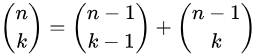

In [65]:
# 재귀 호출을 이용한 이항 계수의 계산
def bino(n, k):
    # 기저 사례 : n=k(모든 원소를 다 고르는 경우) OR k=0(고를 원소가 없는 경우)
    if k==0 or n==k:
        return 1
    print(n, k)
    return bino(n-1, k-1) + bino(n-1, k)
    

In [71]:
bino(6, 2)

6 2
5 1
4 1
3 1
2 1
5 2
4 1
3 1
2 1
4 2
3 1
2 1
3 2
2 1


15

Memoization : 한 번 계산한 값을 저장 후 재활용하는 최적화 기법

<font color='red'>데코레이터란?</font>

In [3]:
# -*- coding: utf-8 -*-
def decorator_function(original_function):
    def wrapper_function():
        print('{} 함수가 호출되기전 입니다.'.format(original_function.__name__))
        return original_function()
    return wrapper_function


@decorator_function  #1
def display_1():
    print('display_1 함수가 실행됐습니다.')


@decorator_function  #2
def display_2():
    print('display_2 함수가 실행됐습니다.')

# display_1 = decorator_function(display_1)  #3
# display_2 = decorator_function(display_2)  #4

display_1()
print
display_2()

display_1 함수가 호출되기전 입니다.
display_1 함수가 실행됐습니다.
display_2 함수가 호출되기전 입니다.
display_2 함수가 실행됐습니다.


### 데코레이터를 사용한 메모이제이션
https://soooprmx.com/archives/5149

In [67]:
#메모이제이션 데코레이터 함수
# 제약 : 함수는 1개의 인자를 받아야 함, 인자는 딕셔너리의 키가 되어야 함.(hashable)
def memoize(func):
    tempMemo = dict()
    def wrapped(n):
        if n in tempMemo:
            return tempMemo[n]
        result = func(n)
        tempMemo[n] = result
        return result
    return wrapped

In [68]:
# 2개의 인자를 받는 메모이제이션
from collections import defaultdict
def memoize(func):
    tempMemo = defaultdict(dict)
    def wrapped(n, r):
        if n in tempMemo:
            if r in tempMemo[n]:
                return tempMemo[n][r]
        result = func(n, r)
        tempMemo[n][r] = result
        return result
    return wrapped

In [69]:
# 메모이제이션을 이용한 이항 계수의 계산
@memoize
def bino2(n, k):
    # 기저 사례
    if k==0 or n==k:
        return 1
    print(n, k)
    return bino2(n-1, k-1)+bino2(n-1, k)

In [70]:
# 실행 예
bino2(6, 2)

6 2
5 1
4 1
3 1
2 1
5 2
4 2
3 2


15

#### 메모이제이션 구현 패턴

* 항상 기저 사례를 제일 먼저 처리한다.(입력이 범위를 벗어난 경우 등)
* 메모이제이션을 초기화한다.

#### 예제 : 외발 뛰기

* 동적 계획법 알고리즘 만들기
    * 재귀적 완전 탐색 알고리즘 만들기

완전 탐색 경로의 수는 많지만<br/>
재귀 함수에 주어지는 입력의 개수는 100**100 밖에 없다</br>
#### 그래프(7장)로 모델링하면 간단하게 도달 가능 문제가 된다.

#### 문제 : 와일드카드